In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = 999
pd.options.display.max_columns =24
import datetime as dt
import colorsys

## Fetching the data from the cloud.

In [2]:
url="https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv"
df=pd.read_csv(url)

In [3]:
# df = pd.read_csv("nics-firearm-background-checks.csv")

In [4]:
df.head(100)

month                 state    permit  permit_recheck  handgun  \
0   2018-10               Alabama   23244.0             1.0   5218.0   
1   2018-10                Alaska     141.0            11.0   3034.0   
2   2018-10               Arizona    5078.0           429.0   9886.0   
3   2018-10              Arkansas    4415.0           597.0   4312.0   
4   2018-10            California   42223.0             0.0  32567.0   
5   2018-10              Colorado    7004.0             0.0  15101.0   
6   2018-10           Connecticut    6875.0           413.0   4575.0   
7   2018-10              Delaware     138.0             0.0   1420.0   
8   2018-10  District of Columbia     116.0             0.0     81.0   
9   2018-10               Florida   13921.0             0.0  40226.0   
10  2018-10               Georgia   17241.0             0.0  10007.0   
11  2018-10                  Guam       0.0             0.0    120.0   
12  2018-10                Hawaii    1201.0             0.0      0.0   
13  2018-10                 Idaho    7265.0             3.0   3034.0   
14  2018-10              Illinois   13700.0        194077.0  17916.0   
15  2018-10               Indiana   28925.0             0.0  15032.0   
16  2018-10                  Iowa    6315.0          6201.0    173.0   
17  2018-10                Kansas    2136.0            15.0   4223.0   
18  2018-10              Kentucky  394208.0             0.0   7065.0   
19  2018-10             Louisiana    2014.0           190.0   8073.0   
20  2018-10                 Maine     532.0             0.0   2565.0   
21  2018-10       Mariana Islands       0.0             0.0      5.0   
22  2018-10              Maryland    2240.0             0.0   4020.0   
23  2018-10         Massachusetts   10864.0             0.0   3750.0   
24  2018-10              Michigan   19282.0            13.0   8259.0   
25  2018-10             Minnesota   11735.0         22314.0   5041.0   
26  2018-10           Mississippi    2028.0             0.0   6049.0   
27  2018-10              Missouri    2328.0             0.0  15963.0   
28  2018-10               Montana    1178.0             0.0   2293.0   
29  2018-10              Nebraska    3780.0           188.0    119.0   
30  2018-10                Nevada    2236.0             0.0   3731.0   
31  2018-10         New Hampshire    1232.0             0.0   4238.0   
32  2018-10            New Jersey       0.0             0.0   3710.0   
33  2018-10            New Mexico     703.0             0.0   4655.0   
34  2018-10              New York    3170.0          2449.0   8258.0   
35  2018-10        North Carolina   20798.0             0.0   1392.0   
36  2018-10          North Dakota     556.0             0.0   1487.0   
37  2018-10                  Ohio   12733.0           809.0  18401.0   
38  2018-10              Oklahoma    4383.0             0.0   8849.0   
39  2018-10                Oregon    5442.0            44.0  11776.0   
40  2018-10          Pennsylvania   23850.0             0.0  41412.0   
41  2018-10           Puerto Rico       0.0             0.0   2419.0   
42  2018-10          Rhode Island       0.0             0.0    947.0   
43  2018-10        South Carolina    5205.0           236.0   7002.0   
44  2018-10          South Dakota    1258.0             0.0   1882.0   
45  2018-10             Tennessee   18915.0             0.0  20286.0   
46  2018-10                 Texas   30568.0             0.0  34646.0   
47  2018-10                  Utah   11644.0           124.0   2615.0   
48  2018-10               Vermont       0.0             0.0   1100.0   
49  2018-10        Virgin Islands     101.0             0.0     39.0   
50  2018-10              Virginia    1781.0            72.0  17662.0   
51  2018-10            Washington   13545.0            61.0  14925.0   
52  2018-10         West Virginia    2113.0             0.0   5250.0   
53  2018-10             Wisconsin    9121.0             0.0  11766.0   
54  2018-10               Wyoming     478.0   

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 27 columns):
month                        13200 non-null object
state                        13200 non-null object
permit                       13176 non-null float64
permit_recheck               1815 non-null float64
handgun                      13180 non-null float64
long_gun                     13181 non-null float64
other                        6215 non-null float64
multiple                     13200 non-null int64
admin                        13177 non-null float64
prepawn_handgun              11257 non-null float64
prepawn_long_gun             11255 non-null float64
prepawn_other                5830 non-null float64
redemption_handgun           11260 non-null float64
redemption_long_gun          11259 non-null float64
redemption_other             5830 non-null float64
returned_handgun             2915 non-null float64
returned_long_gun            2860 non-null float64
returned_other   

In [6]:
df.shape

(13200, 27)

In [7]:
df.describe()

permit  permit_recheck        handgun       long_gun  \
count   13176.000000     1815.000000   13180.000000   13181.000000   
mean     6915.046220     1887.507438    6169.832853    7806.017905   
std     26139.844084    15314.651595    8907.134048    9230.017769   
min         0.000000        0.000000       0.000000       0.000000   
25%         0.000000        0.000000     930.000000    2105.000000   
50%       614.500000        0.000000    3192.000000    5133.000000   
75%      4686.250000        3.000000    7570.500000   10404.000000   
max    522188.000000   199766.000000  107224.000000  108058.000000   

              other      multiple         admin  prepawn_handgun  \
count   6215.000000  13200.000000  13177.000000     11257.000000   
mean     402.512953    273.911212     56.836533         4.932309   
std     1317.958895    773.417971    589.693343        11.027460   
min        0.000000      0.000000      0.000000         0.000000   
25%       20.000000     15.000000      0.000000         0.000000   
50%      139.000000    128.000000      0.000000         0.000000   
75%      402.000000    306.000000      0.000000         5.000000   
max    77929.000000  38907.000000  28083.000000       164.000000   

       prepawn_long_gun  prepawn_other  redemption_handgun  \
count      11255.000000    5830.000000        11260.000000   
mean           7.674722       0.221441          422.033037   
std           16.082503       1.112409          809.287284   
min            0.000000       0.000000            0.000000   
25%            0.000000       0.000000            0.000000   
50%            1.000000       0.000000           45.000000   
75%            8.000000       0.000000          575.000000   
max          269.000000      49.000000        10046.000000   

       redemption_long_gun      ...        returned_handgun  \
count         11259.000000      ...             2915.000000   
mean            593.274891      ...               37.574271   
std             941.013274      ...               96.359468   
min               0.000000      ...                0.000000   
25%               0.000000      ...                0.000000   
50%             176.000000      ...                0.000000   
75%             863.000000      ...               26.000000   
max            8831.000000      ...              810.000000   

       returned_long_gun  returned_other  rentals_handgun  rentals_long_gun  \
count        2860.000000     2530.000000      1705.000000       1540.000000   
mean            9.158741        1.157312         0.137243          0.125974   
std            23.631143        4.448261         0.973199          0.833649   
min             0.000000        0.000000         0.000000          0.000000   
25%             0.000000        0.000000         0.000000          0.000000   
50%             0.000000        0.000000         0.000000          0.000000   
75%             6.000000        0.000000         0.000000          0.000000   
max           168.000000       64.000000        13.000000         12.000000   

       private_sale_handgun  private_sale_long_gun  private_sale_other  \
count           3465.000000            3465.000000         3465.000000   
mean              20.090620              16.406061            1.657720   
std               85.860035              67.351105            6.136111   
min                0.000000               0.000000            0.000000   
25%                0.000000               0.000000            0.000000   
50%                0.000000               0.000000            0.000000   
75%                7.000000               9.000000            1.000000   
max             1017.000000             913.000000           91.000000   

       return_to_seller_handgun  return_to_seller_long_gun  \
count               3190.000000                3465.000000   
mean                   0.575549                   0.607792   
std                    2.769797                   2.435187   
min             

## Checking for duplicates

In [8]:
df_duplicates = df.drop_duplicates()
df_duplicates.shape

(13200, 27)

## Number of missing value per column

In [9]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
dtype: int64

In [10]:
# print(df[df.isnull().any(axis=1)][null_columns].head())

## Filling missing values

After going through the columns and it's type, I concluded to fill the missing values with 0. 

Reason to this is because the information only tells us how many background check were performed for each permit type, and if the value is NaN then it must mean that there weren't any or unavailable.

In [11]:
df.fillna(0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 27 columns):
month                        13200 non-null object
state                        13200 non-null object
permit                       13200 non-null float64
permit_recheck               13200 non-null float64
handgun                      13200 non-null float64
long_gun                     13200 non-null float64
other                        13200 non-null float64
multiple                     13200 non-null int64
admin                        13200 non-null float64
prepawn_handgun              13200 non-null float64
prepawn_long_gun             13200 non-null float64
prepawn_other                13200 non-null float64
redemption_handgun           13200 non-null float64
redemption_long_gun          13200 non-null float64
redemption_other             13200 non-null float64
returned_handgun             13200 non-null float64
returned_long_gun            13200 non-null float64
returned_ot

In [12]:
df.describe()

permit  permit_recheck        handgun       long_gun  \
count   13200.000000    13200.000000   13200.000000   13200.000000   
mean     6902.473409      259.532273    6160.484621    7794.781970   
std     26117.729545     5714.566395    8903.618041    9228.119007   
min         0.000000        0.000000       0.000000       0.000000   
25%         0.000000        0.000000     924.000000    2092.000000   
50%       610.000000        0.000000    3185.000000    5125.500000   
75%      4661.250000        0.000000    7564.000000   10400.250000   
max    522188.000000   199766.000000  107224.000000  108058.000000   

              other      multiple         admin  prepawn_handgun  \
count  13200.000000  13200.000000  13200.000000     13200.000000   
mean     189.516515    273.911212     56.737500         4.206288   
std      926.360961    773.417971    589.184101        10.332363   
min        0.000000      0.000000      0.000000         0.000000   
25%        0.000000     15.000000      0.000000         0.000000   
50%        0.000000    128.000000      0.000000         0.000000   
75%      119.000000    306.000000      0.000000         4.000000   
max    77929.000000  38907.000000  28083.000000       164.000000   

       prepawn_long_gun  prepawn_other  redemption_handgun  \
count      13200.000000   13200.000000        13200.000000   
mean           6.543864       0.097803          360.006970   
std           15.097468       0.747384          762.242036   
min            0.000000       0.000000            0.000000   
25%            0.000000       0.000000            0.000000   
50%            0.000000       0.000000            3.000000   
75%            6.000000       0.000000          442.000000   
max          269.000000      49.000000        10046.000000   

       redemption_long_gun      ...        returned_handgun  \
count         13200.000000      ...            13200.000000   
mean            506.036515      ...                8.297652   
std             894.111646      ...               47.883896   
min               0.000000      ...                0.000000   
25%               0.000000      ...                0.000000   
50%              92.000000      ...                0.000000   
75%             674.000000      ...                0.000000   
max            8831.000000      ...              810.000000   

       returned_long_gun  returned_other  rentals_handgun  rentals_long_gun  \
count       13200.000000    13200.000000     13200.000000      13200.000000   
mean            1.984394        0.221818         0.017727          0.014697   
std            11.627469        1.999707         0.352693          0.287522   
min             0.000000        0.000000         0.000000          0.000000   
25%             0.000000        0.000000         0.000000          0.000000   
50%             0.000000        0.000000         0.000000          0.000000   
75%             0.000000        0.000000         0.000000          0.000000   
max           168.000000       64.000000        13.000000         12.000000   

       private_sale_handgun  private_sale_long_gun  private_sale_other  \
count          13200.000000           13200.000000        13200.000000   
mean               5.273788               4.306591            0.435152   
std               44.865026              35.250574            3.227004   
min                0.000000               0.000000            0.000000   
25%                0.000000               0.000000            0.000000   
50%                0.000000               0.000000            0.000000   
75%                0.000000               0.000000            0.000000   
max             1017.000000             913.000000           91.000000   

       return_to_seller_handgun  return_to_seller_long_gun  \
count              13200.000000               13200.000000   
mean                   0.139091                   0.159545   
std                    1.383576                   1.275872   
min             

## Parsing column 'month' into month, year

In [13]:
df['str_split'] = df.month.str.split('-')
df['year'] = df.str_split.str.get(0)
df['months'] = df.str_split.str.get(1)

print(df.head(100))

      month                 state    permit  permit_recheck  handgun  \
0   2018-10               Alabama   23244.0             1.0   5218.0   
1   2018-10                Alaska     141.0            11.0   3034.0   
2   2018-10               Arizona    5078.0           429.0   9886.0   
3   2018-10              Arkansas    4415.0           597.0   4312.0   
4   2018-10            California   42223.0             0.0  32567.0   
5   2018-10              Colorado    7004.0             0.0  15101.0   
6   2018-10           Connecticut    6875.0           413.0   4575.0   
7   2018-10              Delaware     138.0             0.0   1420.0   
8   2018-10  District of Columbia     116.0             0.0     81.0   
9   2018-10               Florida   13921.0             0.0  40226.0   
10  2018-10               Georgia   17241.0             0.0  10007.0   
11  2018-10                  Guam       0.0             0.0    120.0   
12  2018-10                Hawaii    1201.0             0.0     

In [14]:
df.groupby(['year','state'])["totals", "return_to_seller_handgun","return_to_seller_long_gun","return_to_seller_other"].apply(lambda x : x.astype(int).sum())


totals  return_to_seller_handgun  \
year state                                                     
1998 Alabama                 36568                         0   
     Alaska                   3985                         0   
     Arizona                 17453                         0   
     Arkansas                21752                         0   
     California              67445                         0   
     Colorado                23798                         0   
     Connecticut              6870                         0   
     Delaware                 2135                         0   
     District of Columbia        0                         0   
     Florida                 32341                         0   
     Georgia                  3819                         0   
     Guam                        9                         0   
     Hawaii                    431                         0   
     Idaho                    7339                         0   
     Illinois                41477                         0   
     Indiana                 22518                         0   
     Iowa                    14650                         0   
     Kansas                  12386                         0   
     Kentucky                31869                         0   
     Louisiana               27642                         0   
     Maine                    4106                         0   
     Mariana Islands             0                         0   
     Maryland                 9007                         0   
     Massachusetts            1443                         0   
     Michigan                30596                         0   
     Minnesota               12116                         0   
     Mississippi             26097                         0   
     Missouri                24087                         0   
     Montana                  6406                         0   
     Nebraska                 6655                         0   
     Nevada                   6439                         0   
     New Hampshire            2442                         0   
     New Jersey               3795                         0   
     New Mexico               9033                         0   
     New York                14736                         0   
     North Carolina          38943                         0   
     North Dakota             2437                         0   
     Ohio                    32481                         0   
     Oklahoma                20075                         0   
     Oregon                  14024                         0   
     Pennsylvania            48317                         0   
     Puerto Rico               513                         0   
     Rhode Island             1059                         0   
     South Carolina           9565                         0   
     South Dakota             2751                         0   
     Tennessee               24773                         0   
     Texas                   82399                         0   
     Utah                    10682                         0   
     Vermont                  2116                         0   
     Virgin Islands              0                         0   
     Virginia                25194                         0   
     Washington              12002                         0   
     West Virginia           14194                         0   
     Wisconsin               15442                         0   
     Wyoming                  3486                         0   
1999 Alabama                246756                         0   
     Alaska                  43073                         0   
     Arizona                173548                         0   
     Arkansas               184616                         0   
     California             883144                         0   
     Colorado               257308                         0

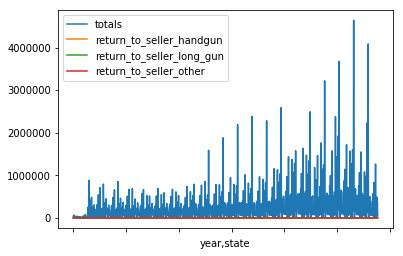

In [15]:
df.groupby(['year','state'])["totals", "return_to_seller_handgun","return_to_seller_long_gun","return_to_seller_other"].apply(lambda x : x.astype(int).sum()).plot()


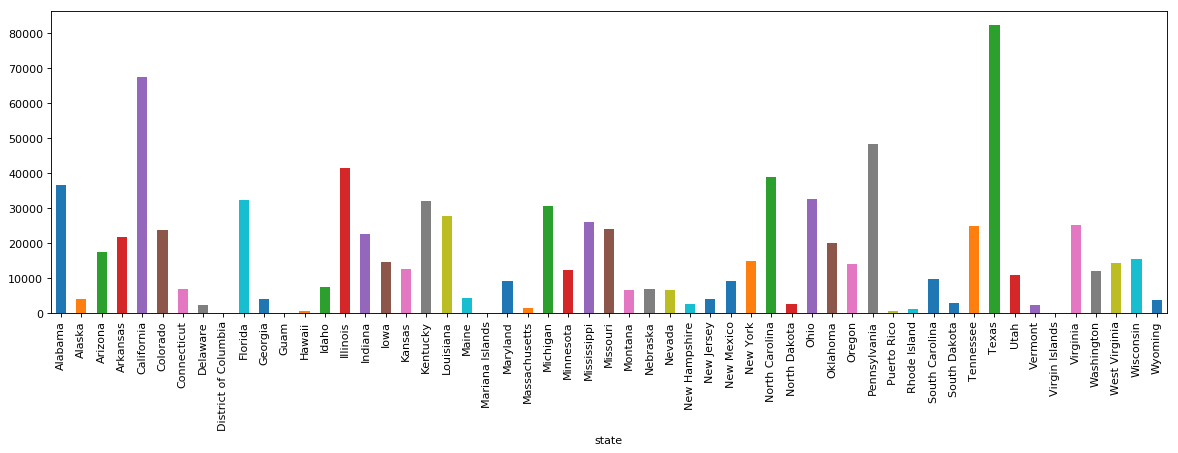

In [16]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 1998]
ds.groupby(['state'])["totals"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")


<Figure size 2240x1200 with 0 Axes>

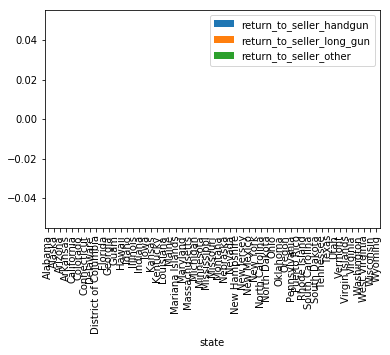

In [17]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(28, 15), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 1998]
ds.groupby(['state'])["return_to_seller_handgun","return_to_seller_long_gun","return_to_seller_other"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")


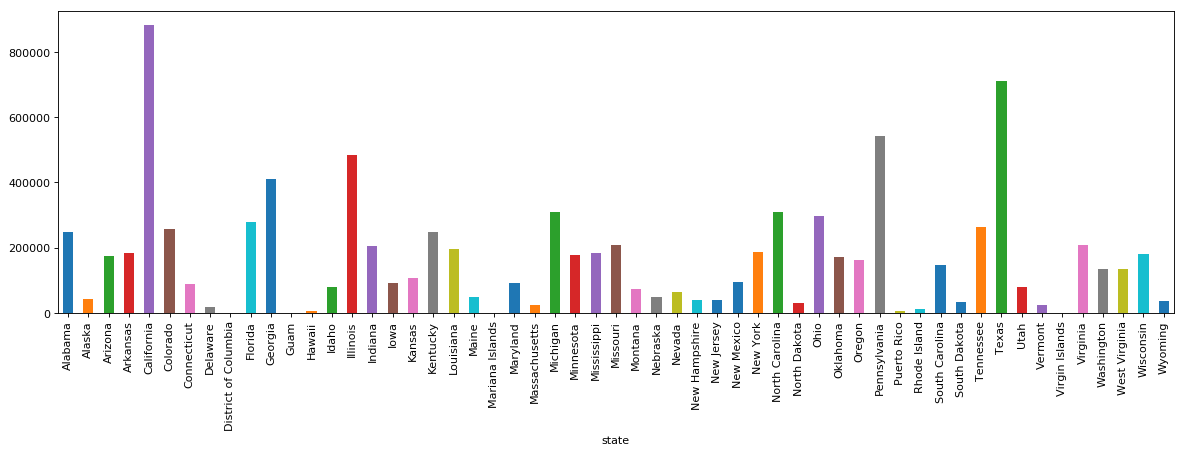

In [18]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 1999]
ds.groupby(['state'])["totals"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")


<Figure size 2240x1200 with 0 Axes>

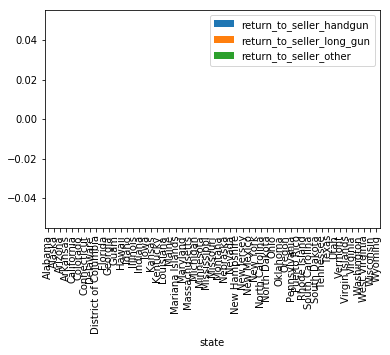

In [19]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(28, 15), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 1999]
ds.groupby(['state'])["return_to_seller_handgun","return_to_seller_long_gun","return_to_seller_other"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")


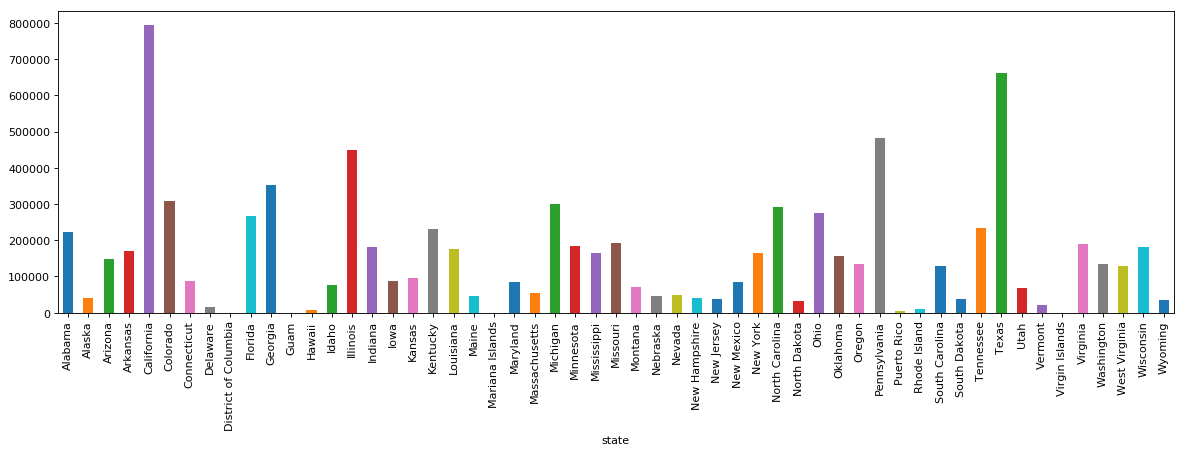

In [20]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2000]
ds.groupby(['state'])["totals"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")



<Figure size 2240x1200 with 0 Axes>

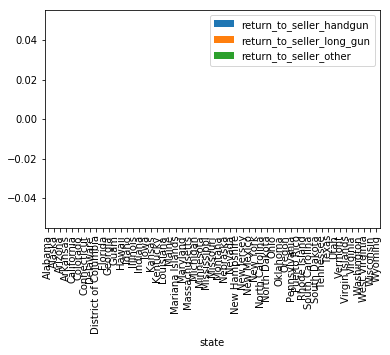

In [21]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(28, 15), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2000]
ds.groupby(['state'])["return_to_seller_handgun","return_to_seller_long_gun","return_to_seller_other"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")


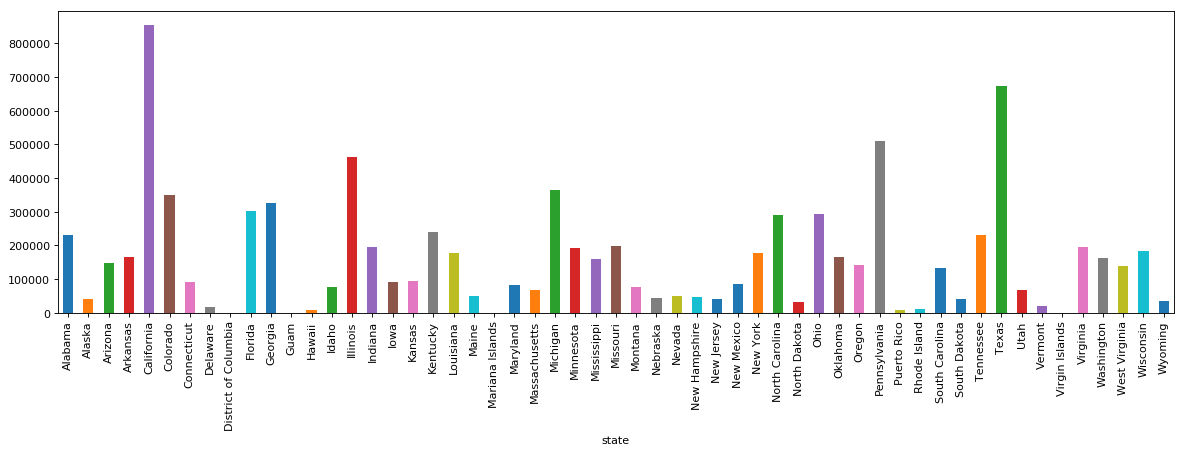

In [22]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2001]
ds.groupby(['state'])["totals"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")



<Figure size 2240x1200 with 0 Axes>

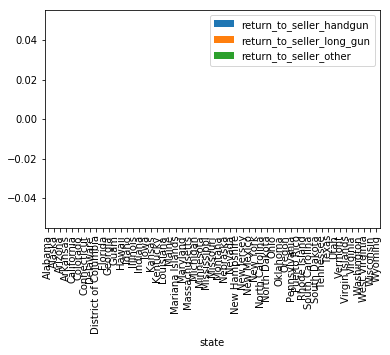

In [23]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(28, 15), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2001]
ds.groupby(['state'])["return_to_seller_handgun","return_to_seller_long_gun","return_to_seller_other"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")


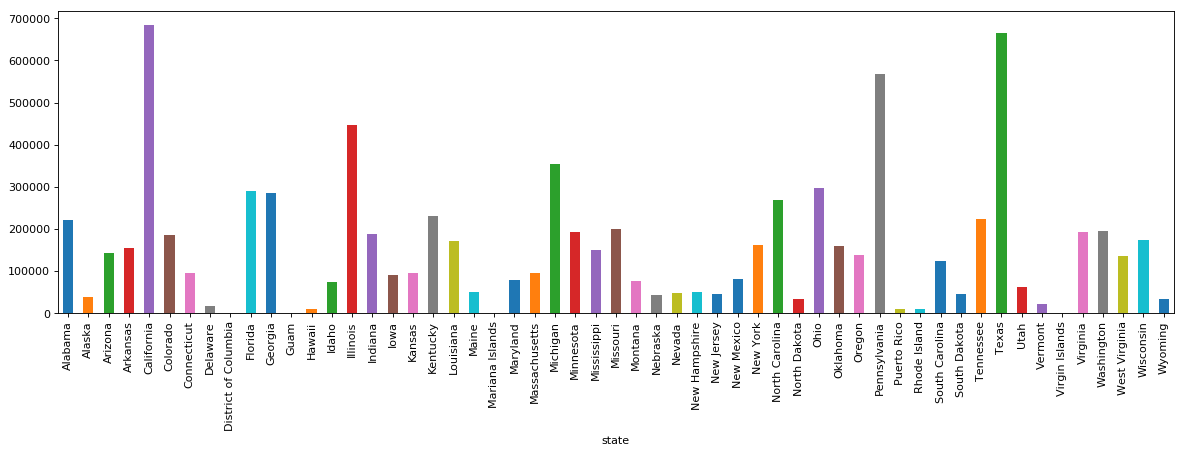

In [24]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2002]
ds.groupby(['state'])["totals"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")



<Figure size 2240x1200 with 0 Axes>

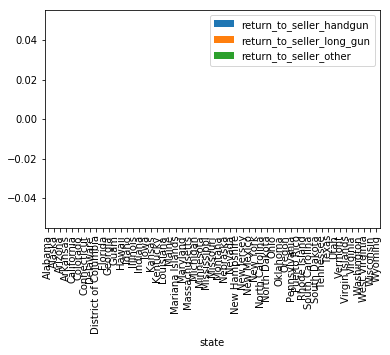

In [25]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(28, 15), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2002]
ds.groupby(['state'])["return_to_seller_handgun","return_to_seller_long_gun","return_to_seller_other"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")


In [26]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2003]
ds.groupby(['state'])["totals"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")



<Figure size 2240x1200 with 0 Axes>

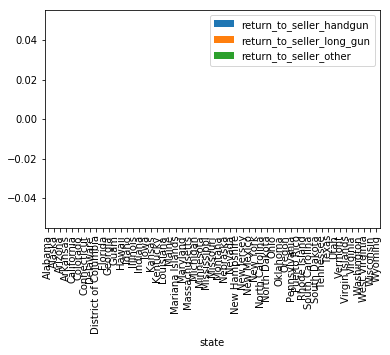

In [27]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(28, 15), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2003]
ds.groupby(['state'])["return_to_seller_handgun","return_to_seller_long_gun","return_to_seller_other"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")


In [28]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2004]
ds.groupby(['state'])["totals"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")



<Figure size 2240x1200 with 0 Axes>

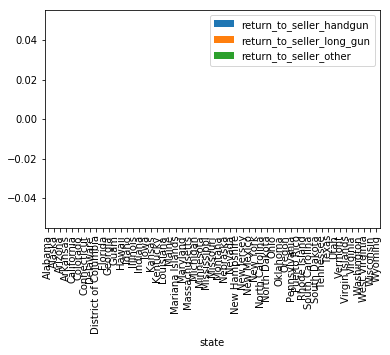

In [29]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(28, 15), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2004]
ds.groupby(['state'])["return_to_seller_handgun","return_to_seller_long_gun","return_to_seller_other"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")


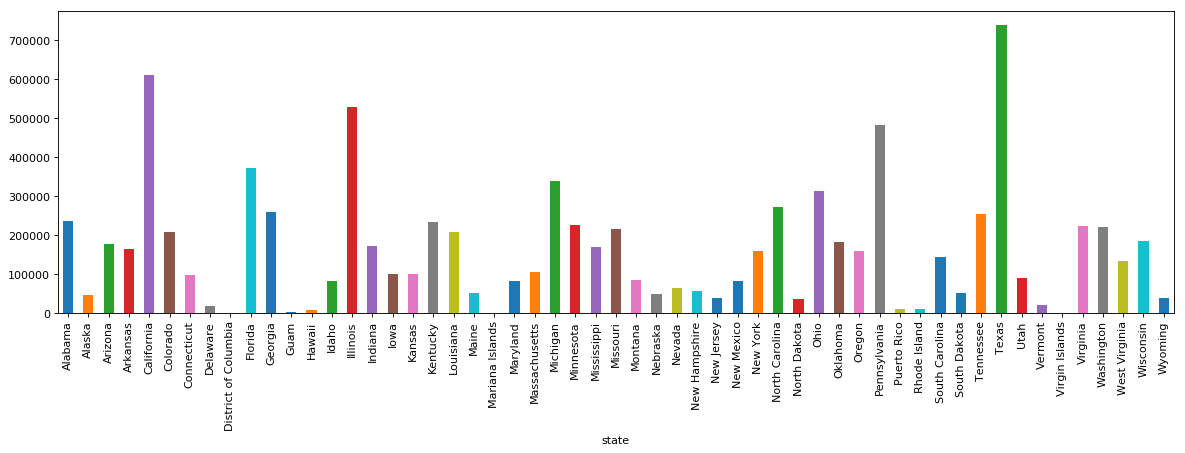

In [30]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2005]
ds.groupby(['state'])["totals"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")



<Figure size 2240x1200 with 0 Axes>

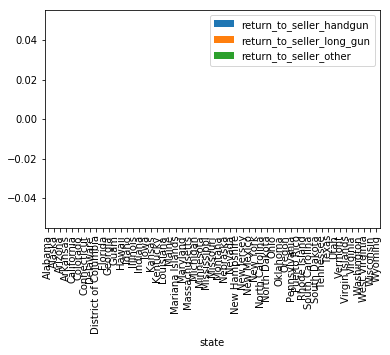

In [31]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(28, 15), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2005]
ds.groupby(['state'])["return_to_seller_handgun","return_to_seller_long_gun","return_to_seller_other"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")


In [32]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2006]
ds.groupby(['state'])["totals"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")



<Figure size 2240x1200 with 0 Axes>

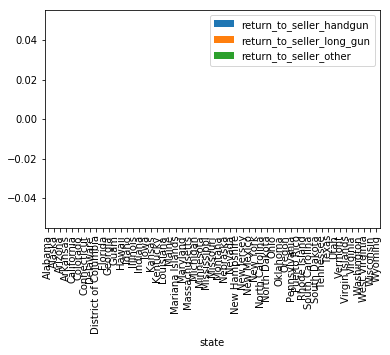

In [33]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(28, 15), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2006]
ds.groupby(['state'])["return_to_seller_handgun","return_to_seller_long_gun","return_to_seller_other"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")


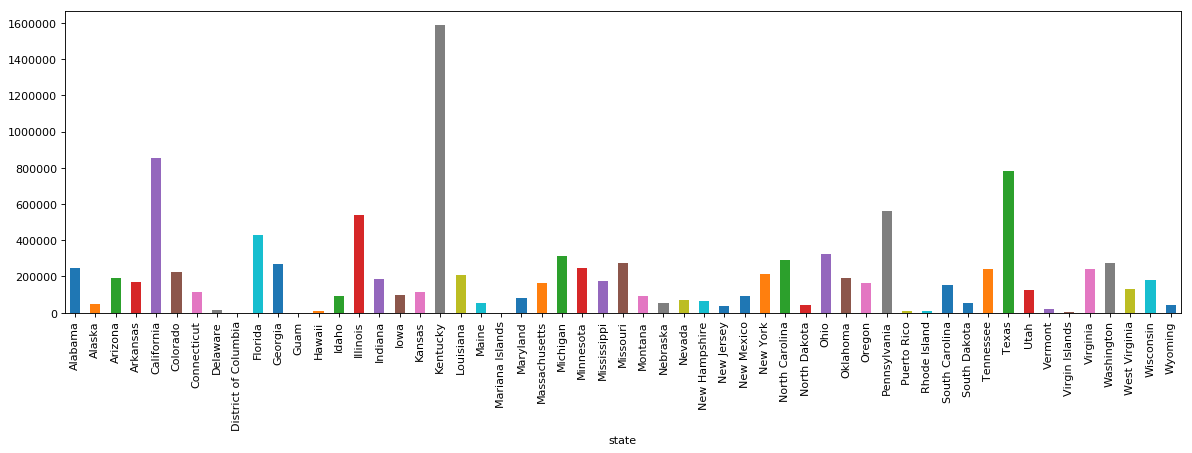

In [34]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2007]
ds.groupby(['state'])["totals"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")



<Figure size 2240x1200 with 0 Axes>

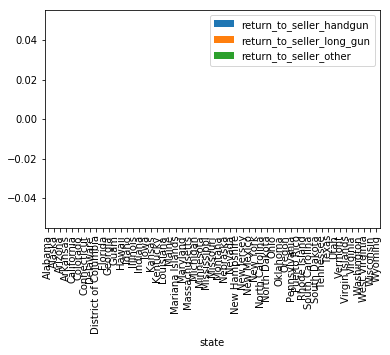

In [35]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(28, 15), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2007]
ds.groupby(['state'])["return_to_seller_handgun","return_to_seller_long_gun","return_to_seller_other"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")


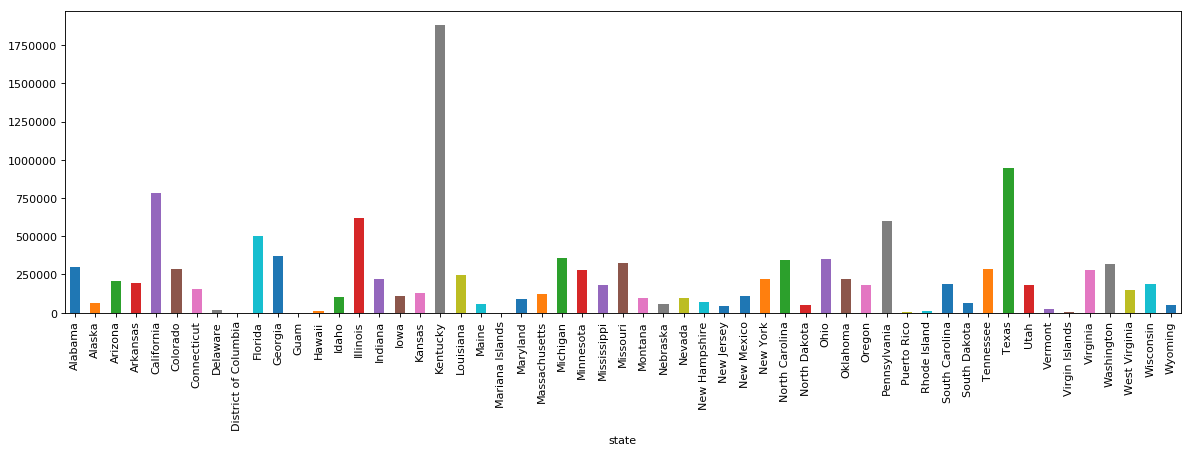

In [36]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2008]
ds.groupby(['state'])["totals"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")



<Figure size 2240x1200 with 0 Axes>

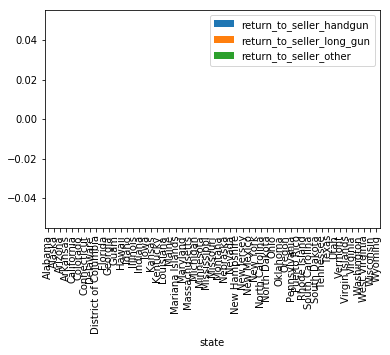

In [37]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(28, 15), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2008]
ds.groupby(['state'])["return_to_seller_handgun","return_to_seller_long_gun","return_to_seller_other"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")


In [38]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2009]
ds.groupby(['state'])["totals"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")



<Figure size 2240x1200 with 0 Axes>

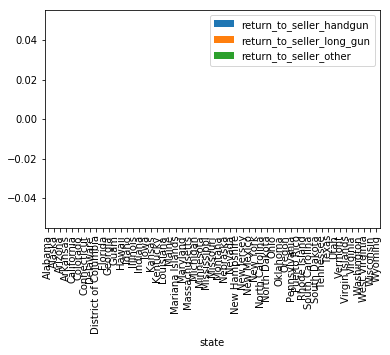

In [39]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(28, 15), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2009]
ds.groupby(['state'])["return_to_seller_handgun","return_to_seller_long_gun","return_to_seller_other"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")


In [40]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2010]
ds.groupby(['state'])["totals"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")



<Figure size 2240x1200 with 0 Axes>

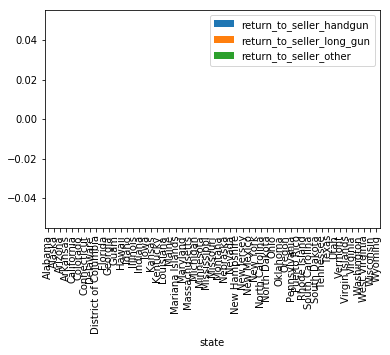

In [41]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(28, 15), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2010]
ds.groupby(['state'])["return_to_seller_handgun","return_to_seller_long_gun","return_to_seller_other"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")


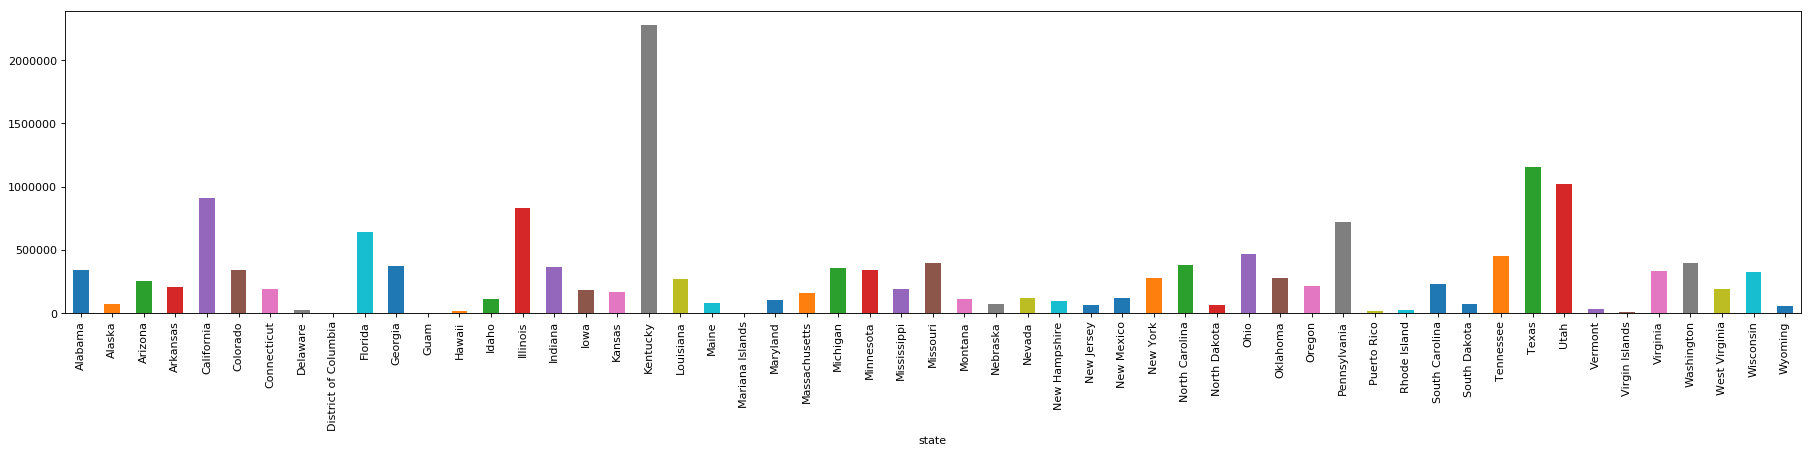

In [42]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(28, 5), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2011]
ds.groupby(['state'])["totals"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")



<Figure size 2240x1200 with 0 Axes>

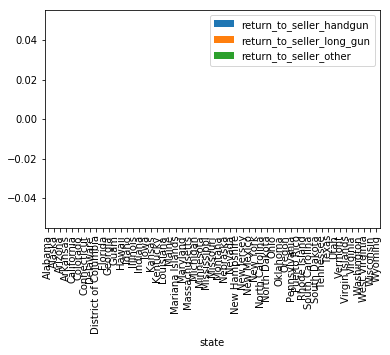

In [43]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(28, 15), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2011]
ds.groupby(['state'])["return_to_seller_handgun","return_to_seller_long_gun","return_to_seller_other"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")


In [44]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2012]
ds.groupby(['state'])["totals"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")



<Figure size 2240x1200 with 0 Axes>

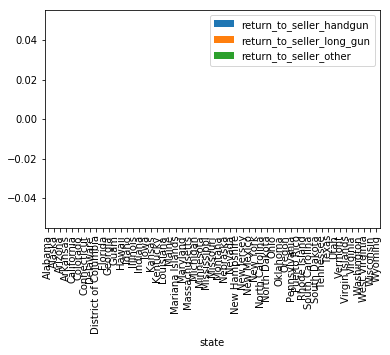

In [45]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(28, 15), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2012]
ds.groupby(['state'])["return_to_seller_handgun","return_to_seller_long_gun","return_to_seller_other"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")


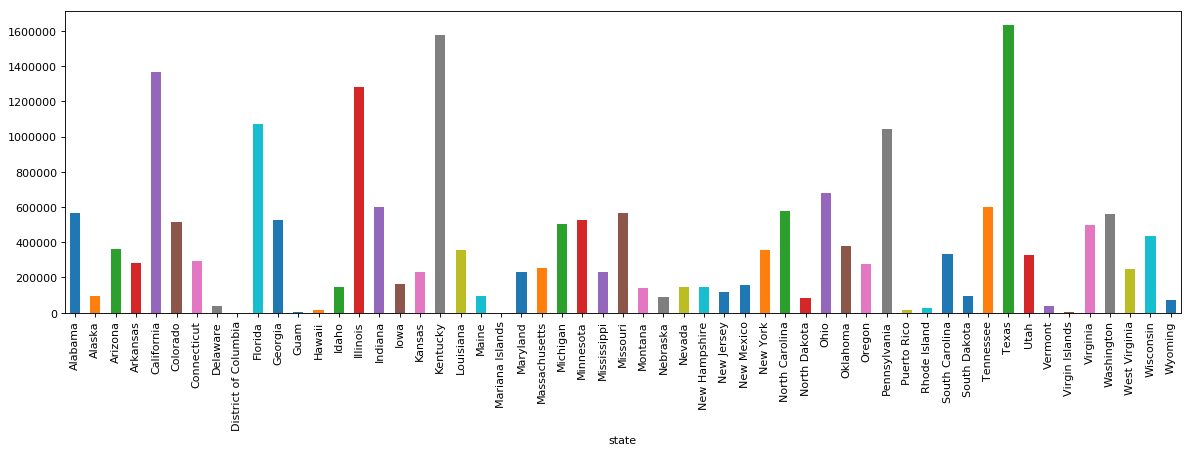

In [46]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2013]
ds.groupby(['state'])["totals"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")



<Figure size 2400x4000 with 0 Axes>

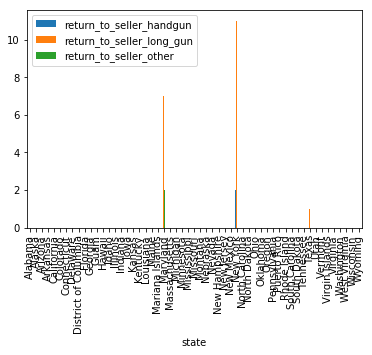

In [47]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(30, 50), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2013]
ds.groupby(['state'])["return_to_seller_handgun","return_to_seller_long_gun","return_to_seller_other"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")


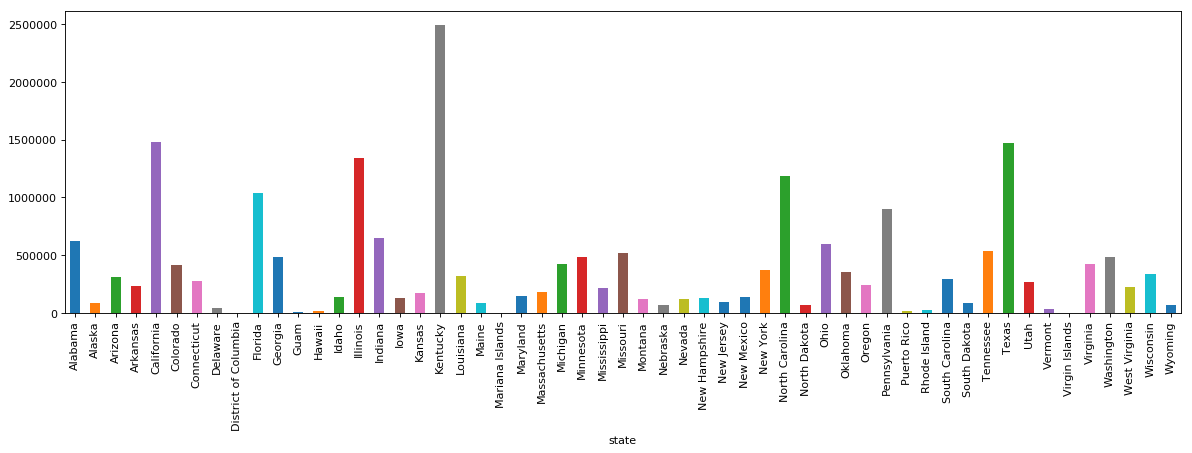

In [48]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2014]
ds.groupby(['state'])["totals"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")



<Figure size 2240x1200 with 0 Axes>

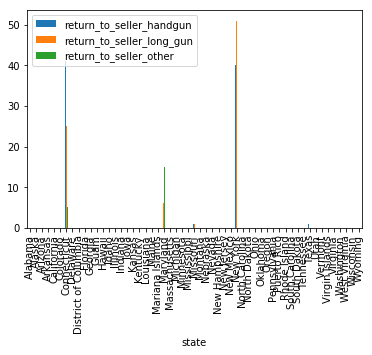

In [49]:

# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(28, 15), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2014]
ds.groupby(['state'])["return_to_seller_handgun","return_to_seller_long_gun","return_to_seller_other"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")


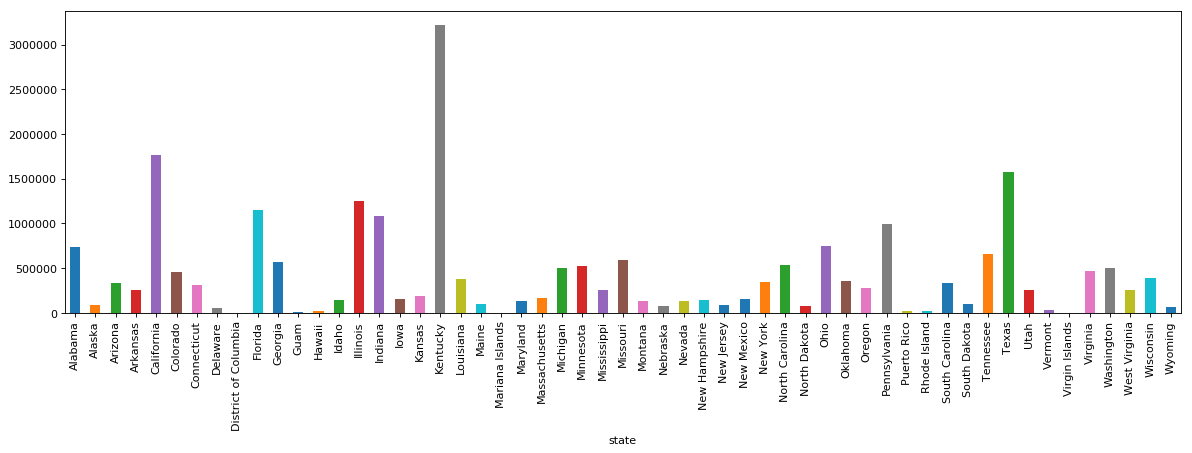

In [50]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2015]
ds.groupby(['state'])["totals"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")



<Figure size 2240x1200 with 0 Axes>

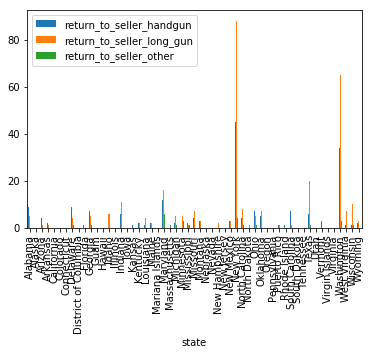

In [51]:
fig=plt.figure(figsize=(28, 15), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2015]
ds.groupby(['state'])["return_to_seller_handgun","return_to_seller_long_gun","return_to_seller_other"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")


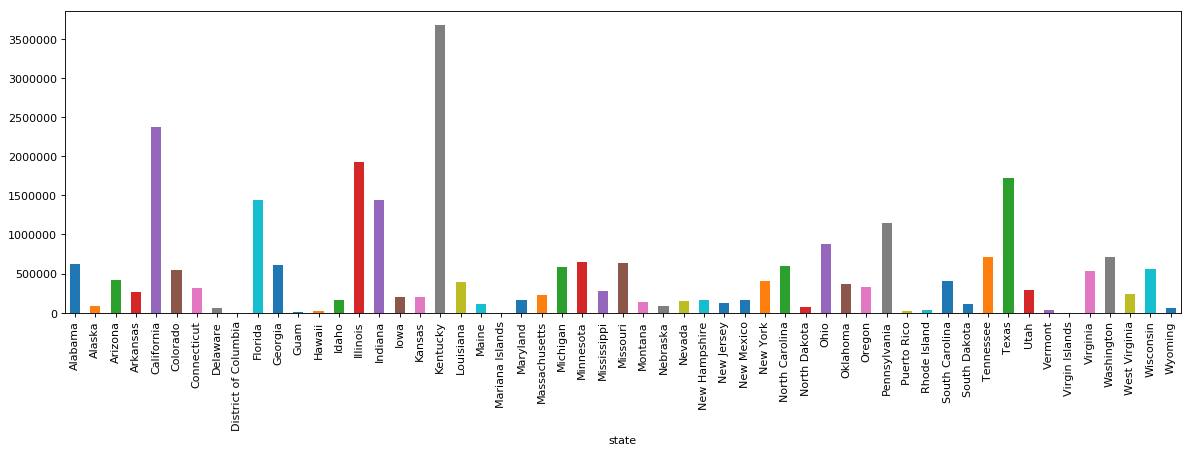

In [52]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2016]
ds.groupby(['state'])["totals"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")



<Figure size 2240x1200 with 0 Axes>

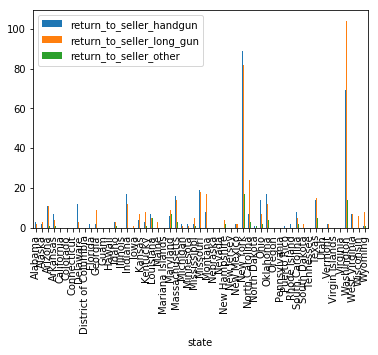

In [53]:
fig=plt.figure(figsize=(28, 15), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2016]
ds.groupby(['state'])["return_to_seller_handgun","return_to_seller_long_gun","return_to_seller_other"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")


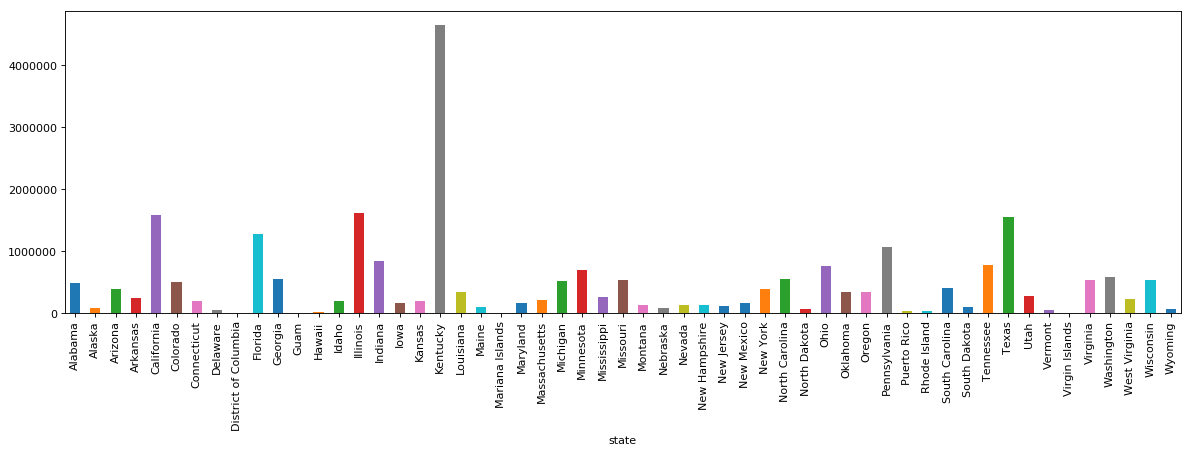

In [54]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2017]
ds.groupby(['state'])["totals"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")



In [55]:
fig=plt.figure(figsize=(28, 15), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2017]
ds.groupby(['state'])["return_to_seller_handgun","return_to_seller_long_gun","return_to_seller_other"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")


<Figure size 2240x1200 with 0 Axes>

In [56]:
# fig, axs = plt.subplots(30, 20)

fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2018]
ds.groupby(['state'])["totals"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")



In [57]:
fig=plt.figure(figsize=(28, 15), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2018]
ds.groupby(['state'])["return_to_seller_handgun","return_to_seller_long_gun","return_to_seller_other"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")


<Figure size 2240x1200 with 0 Axes>

In [58]:
x =df["state"].unique()

data = []
for state in df["state"].unique():
    data.append(df.loc[df["state"]==state].totals.sum())
print(list(data))


[7221227, 1226445, 4842269, 4026260, 20497380, 6640050, 3357936, 543703, 9118, 13036312, 7814024, 16902, 212899, 2190376, 18141182, 8710972, 2502556, 2818143, 35071893, 5047492, 1361969, 672, 2205166, 2797587, 7795695, 6932201, 3848459, 7101685, 2015854, 1219309, 1871315, 1716774, 1250473, 2251438, 5038419, 8360844, 1017179, 9250156, 4943903, 4143075, 14263187, 224710, 316115, 4337664, 1317556, 8075880, 21174224, 4659337, 529766, 16590, 6409848, 7035684, 3473070, 5634213, 959323]


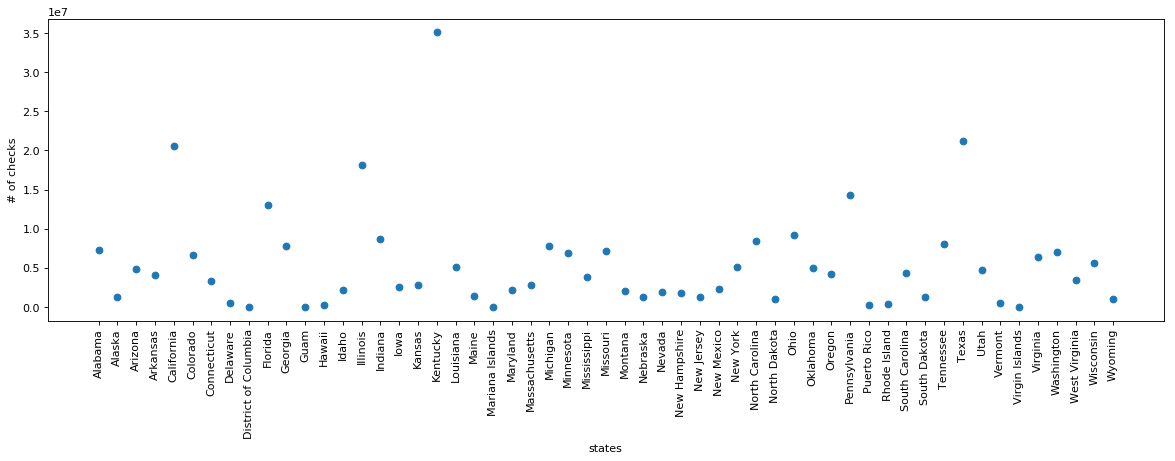

In [84]:
fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
# df['year'] = pd.to_datetime(df['year'])
_ = plt.scatter(x=x,y=data)
_ = plt.xlabel('states')
_ = plt.ylabel('# of checks')
plt.xticks(rotation=90)
plt.savefig("pgf_fonts.png")

plt.show()

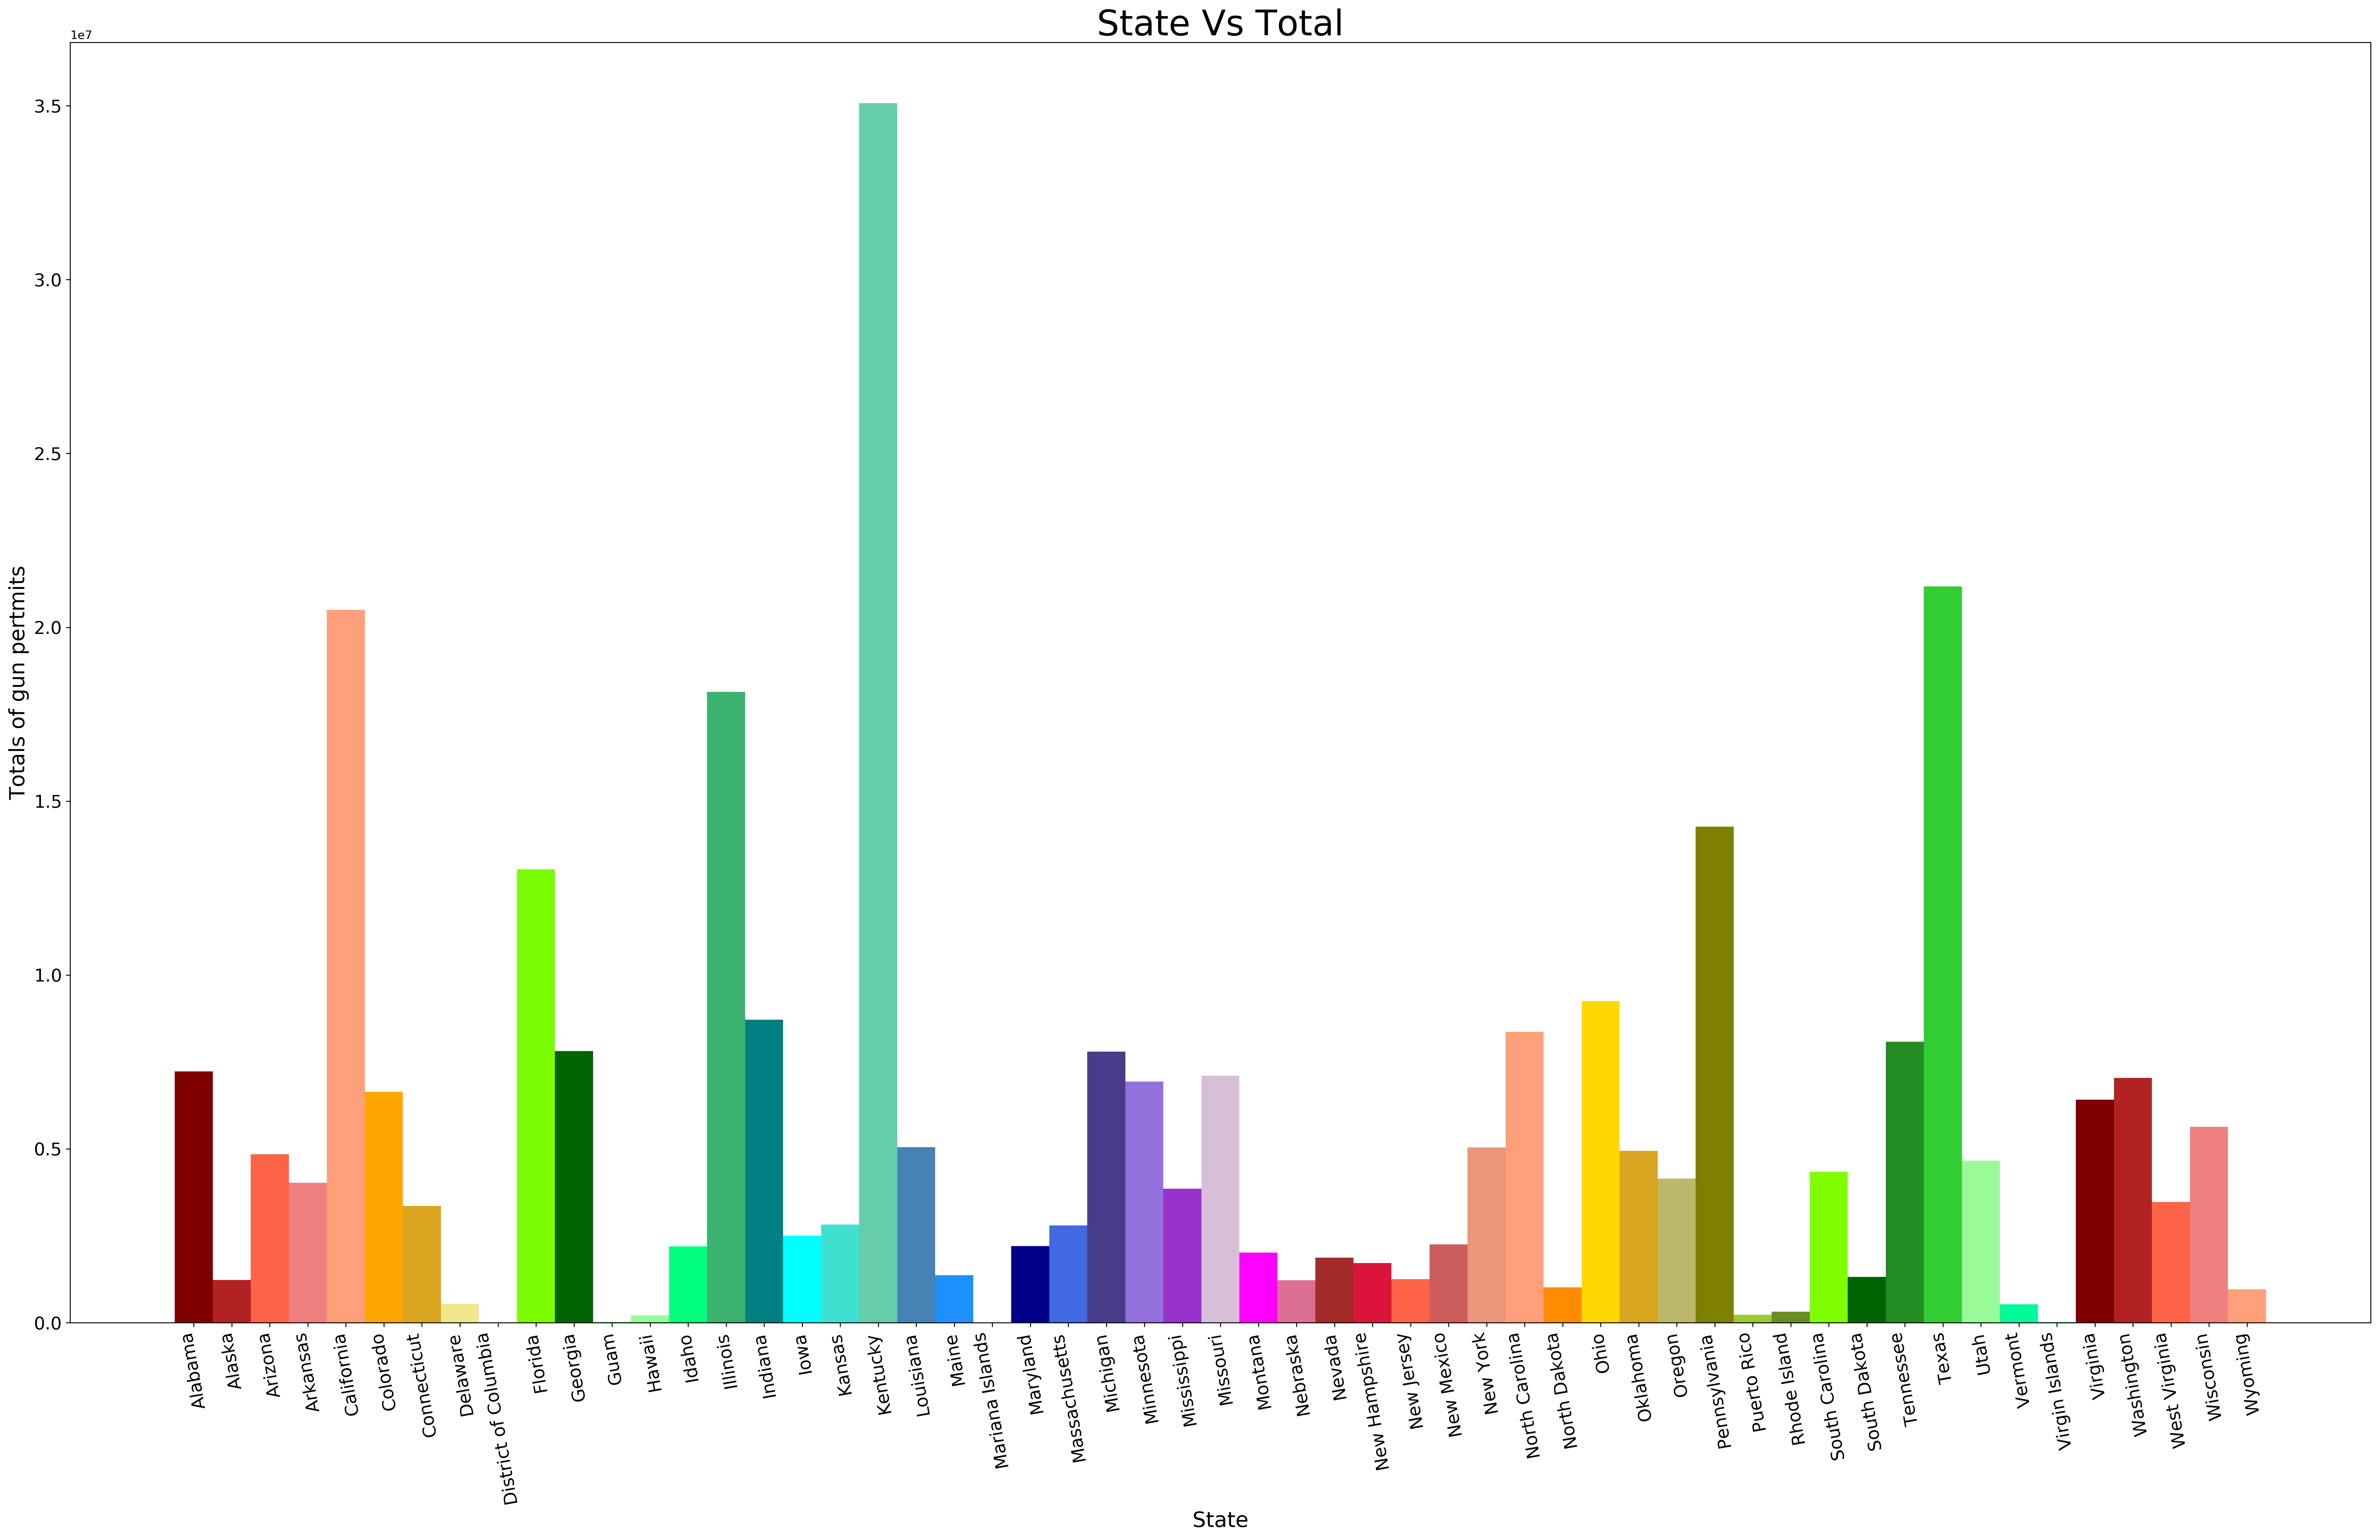

In [131]:
# df.plot(x=x, y=data, kind="bar")
fig=plt.figure(figsize=(35, 20), dpi= 300, facecolor='w', edgecolor='k')
colors = ['#800000','#B22222','#FF6347','#F08080','#FFA07A','#FFA500','#DAA520','#F0E68C','#9ACD32','#7CFC00',
          '#006400','#00FF00','#98FB98','#00FF7F','#3CB371','#008080','#00FFFF','#40E0D0','#66CDAA','#4682B4',
          '#1E90FF','#87CEFA','#00008B','#4169E1','#483D8B','#9370DB','#9932CC','#D8BFD8','#FF00FF','#DB7093',
          '#A52A2A','#DC143C','#FF6347','#CD5C5C','#E9967A','#FFA07A','#FF8C00','#FFD700','#DAA520','#BDB76B',
          '#808000','#9ACD32','#6B8E23','#7FFF00','#006400','#228B22','#32CD32','#98FB98','#00FA9A','#00FF7F']
N = 20
HSV_tuples = [(x*1.0/N, 0.4, 0.9) for x in range(N)]

plt.bar(x, data, 1,color=colors)
plt.xticks(rotation=100,size = 15)
plt.yticks(size = 15)
# plt.xticks(size = 70)
plt.title('State Vs Total', size = 30)
plt.xlabel('State', size = 18)
plt.ylabel('Totals of gun pertmits', size = 18)
plt.savefig("graph.png",dpi=300)

plt.show()
